In [1]:
pip install opencv-python



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pillow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install patchify


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

In [7]:
image=cv2.imread("image_part_001.jpg")
mask=cv2.imread("image_part_001.png")

In [8]:
masky=cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)

In [9]:
image_patch_size=256

In [10]:
size_x=(image.shape[1]//image_patch_size)*image_patch_size
size_y=(image.shape[0]//image_patch_size)*image_patch_size
image=Image.fromarray(image)
image=image.crop((0,0,size_x,size_y))
image=np.array(image)
image_patches=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)

In [11]:
size_mx=(masky.shape[1]//image_patch_size)*image_patch_size
size_my=(masky.shape[0]//image_patch_size)*image_patch_size
masky=Image.fromarray(masky)
masky=masky.crop((0,0,size_mx,size_my))
masky=np.array(masky)
mask_patches=patchify(masky,(image_patch_size,image_patch_size,3),step=image_patch_size)

In [12]:
minmaxscaler=MinMaxScaler()

In [13]:
image_x=image_patches[0,0,:,:]
image_y=minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)
image_y=image_y[0]

In [14]:
mask_x=mask_patches[0,0,:,:]
mask_x=mask_x[0]

In [15]:
images=np.array(image_y)
masks=np.array(mask_x)

In [16]:
print(images)
print(masks)

[[[0.78823529 0.76470588 0.74509804]
  [0.88235294 0.85882353 0.83921569]
  [0.94509804 0.90980392 0.89411765]
  ...
  [0.89411765 0.85882353 0.82352941]
  [0.85882353 0.83137255 0.79607843]
  [0.87843137 0.85098039 0.81568627]]

 [[0.88627451 0.8627451  0.84313725]
  [0.99607843 0.97254902 0.95294118]
  [1.         1.         0.98431373]
  ...
  [0.93333333 0.89803922 0.8627451 ]
  [0.92941176 0.90196078 0.86666667]
  [0.95294118 0.91764706 0.88235294]]

 [[0.97254902 0.94509804 0.93333333]
  [1.         0.98823529 0.97647059]
  [1.         1.         0.98431373]
  ...
  [0.93333333 0.89411765 0.86666667]
  [0.92156863 0.89411765 0.85882353]
  [0.90196078 0.86666667 0.83137255]]

 ...

 [[0.88235294 0.8627451  0.86666667]
  [0.81960784 0.80392157 0.8       ]
  [0.7372549  0.73333333 0.71764706]
  ...
  [0.7254902  0.68235294 0.72156863]
  [0.85490196 0.82352941 0.86666667]
  [0.67843137 0.65882353 0.69411765]]

 [[0.76862745 0.75294118 0.74901961]
  [0.79215686 0.77647059 0.77254902]


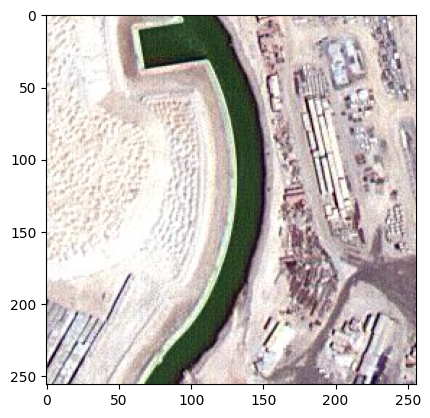

In [17]:
plt.imshow(images)
#plt.imshow(mask)

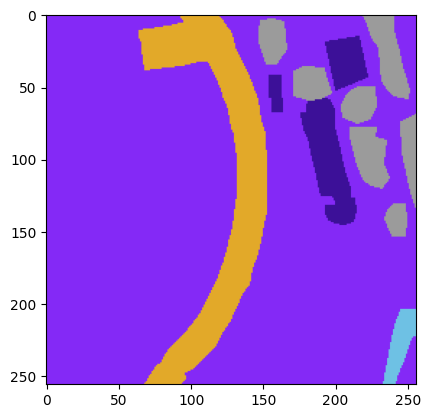

In [18]:
plt.imshow(masks)

In [19]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)


[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [20]:
label=masks

In [21]:
def rgb_to_label(label):
  label_segment=np.zeros(label.shape,dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] =5
  label_segment = label_segment[:,:,0]
  return label_segment

In [22]:
masks.shape[0]

256

In [23]:
print(len(masks[0]))

256


In [24]:
labels=[]
for i in range(masks.shape[0]):
  label=rgb_to_label(masks)
  labels.append(label)

In [25]:
print(len(labels))

256


In [26]:
labels=np.array(labels)

In [27]:
labels[5]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [28]:
np.unique(labels)

array([0, 1, 2, 3, 5], dtype=uint8)

In [29]:
pip install -U segmentation-models

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [31]:
from keras import backend as K

In [32]:
pip install segmentation-models==1.0.1


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [35]:
metrics = ["accuracy", jaccard_coef]

In [36]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [37]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm


     ---------------------------------------- 0.0/422.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/422.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/422.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/422.6 MB ? eta -:--:--
     -------------------------------------- 0.0/422.6 MB 145.2 kB/s eta 0:48:30
     -------------------------------------- 0.0/422.6 MB 145.2 kB/s eta 0:48:30
     -------------------------------------- 0.0/422.6 MB 145.2 kB/s eta 0:48:30
     -------------------------------------- 0.0/422.6 MB 145.2 kB/s eta 0:48:30
     --------------------------------------- 0.0/422.6 MB 93.7 kB/s eta 1:15:12
     --------------------------------------- 0.0/422.6 MB 93.7 kB/s eta 1:15:12
     --------------------------------------- 0.0/422.6 MB 93.7 kB/s eta 1:15:12
     --------------------------------------- 0.0/422.6 MB 93.7 kB/s eta 1:15:12
     --------------------------------------- 0.0/422.6 MB 93.7 kB/s 

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\kavitha\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\kavitha\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\kavitha\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\kavitha\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\kavitha\AppData\Local\Programs\Python\Python39\lib\http\client.py", line 455, in read
    n = self.readinto(b)
  File "C:\Users\kavitha\AppData\Local\Programs\Python\Python39\lib\http\client.py", line 499, 

Segmentation Models: using `tf.keras` framework.


In [39]:
def custom_loss(y_true, y_pred):
    return dice_loss(y_true, y_pred) + (1 * focal_loss(y_true, y_pred))


In [41]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model("Modelsarath.h5", custom_objects={"custom_loss": custom_loss, "jaccard_coef": jaccard_coef})

In [42]:
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [47]:
import numpy as np

# Preprocess the input image (resize, normalize, etc.)
preprocessed_image = images

# Expand the dimensions of the input image if needed (e.g., from (H, W, C) to (1, H, W, C))
preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

# Make predictions using the loaded model
predicted_mask = loaded_model.predict(preprocessed_image)


1/1 [==============================] - 1s 974ms/step


In [48]:
predicted_mask

array([[[[4.44909744e-02, 2.75382996e-01, 5.44167161e-01,
          8.63921419e-02, 4.25252952e-02, 7.04141147e-03],
         [2.23198272e-02, 4.01521921e-01, 5.32715738e-01,
          3.25969383e-02, 9.44525562e-03, 1.40025478e-03],
         [8.51911400e-03, 4.36613321e-01, 5.35243511e-01,
          1.57004911e-02, 3.56257753e-03, 3.60895589e-04],
         ...,
         [2.49120239e-02, 5.18771052e-01, 3.71723980e-01,
          6.64708465e-02, 1.56790279e-02, 2.44307355e-03],
         [3.85183878e-02, 4.20111030e-01, 4.26170677e-01,
          8.00920576e-02, 2.93955971e-02, 5.71217202e-03],
         [7.68656135e-02, 4.29262608e-01, 3.15810919e-01,
          1.05217017e-01, 5.82595728e-02, 1.45842284e-02]],

        [[2.22211163e-02, 7.14432597e-01, 1.97864011e-01,
          5.93578517e-02, 4.66995500e-03, 1.45452435e-03],
         [1.39316183e-03, 9.34430838e-01, 4.62419912e-02,
          1.77442301e-02, 1.79843322e-04, 9.95113351e-06],
         [4.56527749e-04, 9.75248516e-01, 1.7822

In [50]:
y_pred_argmax = np.argmax(predicted_mask, axis=3)

In [51]:
y_pred_argmax

array([[[2, 2, 2, ..., 1, 2, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 1, 1, ..., 2, 2, 2]]], dtype=int64)

In [53]:
preprocessed_image = images

# Expand the dimensions of the input image if needed (e.g., from (H, W, C) to (1, H, W, C))
preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

# Make predictions using the loaded model
predicted_mask = loaded_model.predict(preprocessed_image)


1/1 [==============================] - 0s 279ms/step


In [54]:
predicted_image = np.argmax(predicted_mask, axis=3)
predicted_image = predicted_image[0,:,:]

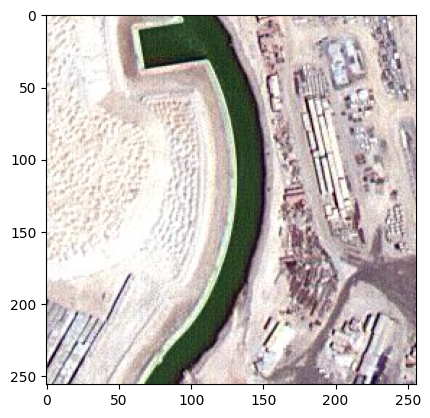

In [56]:
plt.imshow(images)

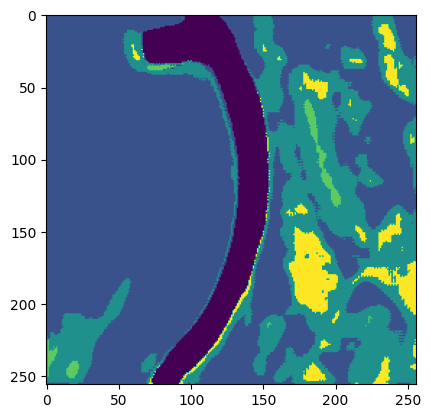

In [55]:
plt.imshow(predicted_image)